<a href="https://colab.research.google.com/github/88kHw88/Winc.Final_Assignment.CO2/blob/main/Final_Assignment_CO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please formulate an answer to the following three questions in your report.

- What is the biggest predictor of a large CO2 output per capita of a country?
- Which countries are making the biggest strides in decreasing CO2 output?
- Which non-fossil fuel energy technology will have the best price in the future?


masterdata:
https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv
https://ourworldindata.org/new-co2-data-explorer 


In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as poly
from scipy import stats
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


## **What is the biggest predictor of a large CO2 output per capita of a country?**

1 GDP vs CO2 emissions

2 Fossil fuels vs CO2 emissions 

3 Lands use/food vs CO2 emissions 

- Agricultural land use is the sum of cropland and pasture for livestock grazing.

4 Transport vs CO2 emissions
- This interactive shows the emissions of carbon dioxide from transport each year. 
- This includes road, train, bus and domestic air travel but does not include international aviation and shipping.



In [32]:
#importing data 
df_gdp = pd.read_csv('https://raw.githubusercontent.com/88kHw88/Winc.Final_Assignment.CO2/main/data_question_1/co2-emissions-vs-gdp.csv')
df_ff = pd.read_csv('https://raw.githubusercontent.com/88kHw88/Winc.Final_Assignment.CO2/main/data_question_1/co2-emissions-by-fuel-line.csv')
df_land = pd.read_csv('https://raw.githubusercontent.com/88kHw88/Winc.Final_Assignment.CO2/main/data_question_1/agricultural-land.csv')
df_co2 = pd.read_csv('https://raw.githubusercontent.com/88kHw88/Winc.Final_Assignment.CO2/main/data_question_1/annual-co2-emissions-per-country.csv')
df_transport = pd.read_csv('https://raw.githubusercontent.com/88kHw88/Winc.Final_Assignment.CO2/main/data_question_1/co2-emissions-transport.csv')

#https://www.kite.com/python/answers/how-to-download-a-csv-file-from-a-url-in-python 

In [33]:
### Defining functions ###

#function to set unique values and adding a new column:
def unique_column(df, col_name_new, col_name1, col_name2, dtype):
  df[col_name_new] = df[col_name1].astype(dtype) + "_" + df[col_name2].astype(dtype)

#function to drop a column from a dataset:
def drop_column(df, column_name1):
  df.drop(columns=column_name1)  

#function to calculate Pearson's correlation:
def correlation(df, column_name, column_name2):
  relation = round(df[column_name].corr(df[column_name2]),4)  
  print(f"De correlatiecoëfficiënt tussen '{column_name}' en '{column_name2}' is: {relation}")

#function to replace data values:
def replace(df, column_name, old_value, new_value):
  column = df[column_name]
  df[column_name] = column.replace({old_value:new_value})

#functions to find missing values:
def uniques(column):
   print(f'This column has the following unique values:\n {column.unique()}\n')

def edges(column):
  try:
    print(f'Sorting unique values:\n {column.sort_values().unique()}\n')
  except ValueError as error:
    print(f'Can"t sort unique values: {error}\n')

def casting(column, dtype):
  try:
    column.astype(dtype)
    print(f'Casting column to {dtype} is successful\n')
  except ValueError as error:
    print(f'Can"t use casting on this column: {error}\n')

def count_values(column):
  print(f"Counting unique values:\n {column.value_counts()}\n")


def finding_missing_values(df, column_name, dtype):
  column = df[column_name]

  print(f'Analyzing missing values in column {column_name}\n ')
  uniques(column)
  edges(column)
  casting(column, dtype)
  count_values(column)
  print('*'*80)

In [34]:
#Make a new column by making a unique value that each dataset has in order to merge datasets
unique_column(df_transport, 'entity_year', 'Entity', 'Year', str)
unique_column(df_co2, 'entity_year', 'Entity', 'Year', str)
unique_column(df_land, 'entity_year', 'Entity', 'Year', str)
unique_column(df_ff, 'entity_year', 'Entity', 'Year', str)

In [35]:
#GDP dataset columns:
df_gdp.columns

#remove irrelevant columns:
df_gdp2 = df_gdp.drop(columns=['Code', '145446-annotations', 'Total population (Gapminder, HYDE & UN)', 'Continent'])
df_gdp2

#drop nan values in columns Annual CO2 emissions (per capita) or GDP per capita:
df_gdp2.dropna(subset=['Annual CO2 emissions (per capita)', 'GDP per capita'])

#In this analysis we use the Pearson's correlationcoefficient. See the analysis report for the arguments.
#Finding correlation between Annual CO2 emissions per capita and GDP per capita:
df_gdp2['Annual CO2 emissions (per capita)'].corr(df_gdp2['GDP per capita'])
#check alternative way:
#df_gdp2.corr()

0.6747265670645733

In [36]:
#Create a new dataset by combining data of CO2 with data of Transport:
#Merge dataset CO2 and Transport together:
df_co2_ff = pd.merge(df_co2, df_ff, on='entity_year')

#Deleting/renaming columns on dataset CO2_transport:
df_co2_ff = df_co2_ff.drop(columns=['Code_x', 'Year_x', 'Entity_y', 'Code_y'])
df_co2_ff = df_co2_ff.rename(columns={'Entity_x':'Entity', 'Year_y': 'Year'})


#Set index:
df_co2_ff = df_co2_ff.set_index(['Entity'])

#filling default missing values with (0):
df_co2_ff = df_co2_ff.fillna(0)
df_co2_ff.head(5)

#applying Pearson correlation
correlation_co2_ff = round(df_co2_ff.corr(),4)
correlation_co2_ff.iloc[0:1, 2:]

,Annual CO2 emissions from oil,Annual CO2 emissions from flaring,Annual CO2 emissions from cement,Annual CO2 emissions from coal,Annual CO2 emissions from gas,Annual CO2 emissions from other industry
Annual CO2 emissions,0.972,0.8383,0.9005,0.9619,0.9403,0.7204


In [37]:
#Create a new dataset by combining data of CO2 with data of Transport:
#Merge dataset CO2 and Transport together:
df_co2_transport = pd.merge(df_co2, df_transport, on='entity_year')

#Deleting/renaming columns or rows on dataset CO2_transport:
df_co2_transport = df_co2_transport.drop(columns=['Code_x', 'Year_x', 'Entity_y', 'Code_y'])
df_co2_transport = df_co2_transport.rename(columns={'Entity_x':'Entity', 'Transport (CAIT, 2020)': 'CO2 emissions by transport', 'Year_y': 'Year'})

#set index:
df_co2_transport = df_co2_transport.set_index(['Entity'])
df_co2_transport.head(5)

#applying Pearson correlation
correlation(df_co2_transport, 'Annual CO2 emissions', 'CO2 emissions by transport')
#check alternative correlation:
#df_co2_transport.corr()


De correlatiecoëfficiënt tussen 'Annual CO2 emissions' en 'CO2 emissions by transport' is: 0.9865


In [38]:
#Create a new dataset by combining data of CO2 with data of 'Land':
#Merge dataset CO2 and Land together:
df_co2_land = pd.merge(df_co2, df_land, on='entity_year')

#Deleting/renaming columns on dataset CO2_land:
df_co2_land = df_co2_land.drop(columns=['Code_x', 'Year_x', 'Entity_y', 'Code_y'])
df_co2_land = df_co2_land.rename(columns={'Entity_x':'Entity', 'Year_y': 'Year'})

#set index
df_co2_land = df_co2_land.set_index(['Entity'])
df_co2_land.head(5)

#Apply Pearson correlation
correlation(df_co2_land, 'Annual CO2 emissions', 'agricultural_land')

#Alternative way to check relation:
#df_co2_land.corr()


De correlatiecoëfficiënt tussen 'Annual CO2 emissions' en 'agricultural_land' is: 0.8982


antwoord:
Transport heeft een hele sterke relatie met CO2 output. De relatie is 0,98.

Gevolgd door fossiele brandstof, waarvan olie (0,97) en kolen (0,96) de grootste voorspellers zijn in de toename van de CO2 uitstoot.


**Which countries are making the biggest strides in decreasing CO2 output?**

Het klimaatverdrag waarin afspraken en conferenties werden gehouden om de CO2 uitstoot te verminderen. 
https://nl.wikipedia.org/wiki/Klimaatverdrag 

1990 - referentiepunt, beginwaarde



Relatively Change:
CO2 output per capita: 

basis is data 2015 (periode voor het ondertekenen van het Klimaatverdrag, Akkoord van Parijs in 2015)

relatieve veranderingen tussen 2016, 2017 en 2018. Deze tellen wij cumulatief op. Het land met de grootste negatieve cumulatieve waarde is het land die het meest doet aan het verminderen van CO2 uitstoot

**Maak gebruik van data df_gdp2:**

Bevat al data 'CO2 per hoofd' (we houden hiermee rekening mee met de CO2 uitstoot per inwoner)


**Achtergrondinfo:**


Co emissions per capita 2
Where in the world do people emit the most CO2?

Greenhouse gas emissions by sector
Total annual emissions allow us to see the world’s largest emitters in absolute terms. 
But they tend to tell a story of population – China and India, for example, are in the top three emitters, 
but are also the two most populous countries in the world.

How do emissions compare when we correct for population?

This interactive map shows per capita greenhouse gas emissions. This is measured in tonnes per person per year.

Here we see that many of the world’s smaller countries are the largest per capita emitters. 
These countries, such as Guyana, Brunei, Botswana, the United Arab Emirates and Kuwait tend to be large oil and/or gas producers.

Of the major emitters we see large differences in per capita emissions: 
 in the US, the average person emits more than 18 tonnes; in China its less than half, at 8 tonnes; and in India, emissions are much smaller at around 2.5 tonnes.
"""

In [39]:
#using df_gdp2 where we removed irrelevant columns
df_gdp2.head(5)

#remove all missing values from column 'Annual CO2 emissions (per capita)' and 'GDP per capita'
df1_gdp2 = df_gdp2.dropna(subset=['Annual CO2 emissions (per capita)', 'GDP per capita'])
df1_gdp2

#checking data and unique values/missing values:
finding_missing_values(df1_gdp2, 'Entity', 'str') #-->  'World' is a non-country


Analyzing missing values in column Entity
 
This column has the following unique values:
 ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Benin' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Honduras' 'Hong Kong'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait'
 'Kyrgyzs

In [40]:
#removing 'World' from our dataset
df2_gdp2 = df1_gdp2.drop(df1_gdp2[df1_gdp2.Entity == 'World'].index)


In [41]:
#Our base is 2015, because of the Treaty of Paris (Klimaatakkoord Parijs 2015):
#Data filteren op jaar: 2016, 2017 en 2018 is.
#Filter on a specific year:
yr_2015 = df2_gdp2.loc[df2_gdp2.Year == 2015]
yr_2016 = df2_gdp2.loc[df2_gdp2.Year == 2016]
yr_2017 = df2_gdp2.loc[df2_gdp2.Year == 2017]
yr_2018 = df2_gdp2.loc[df2_gdp2.Year == 2018]

In [42]:
#Merging datasets 2015, 2016, 2017 and 2018
df2015_2016 = pd.merge(yr_2015, yr_2016, on='Entity')
df2015_2016 = df2015_2016.rename(columns={'Annual CO2 emissions (per capita)_x': 'CO2 emissions 2015 (per capita)', 'Annual CO2 emissions (per capita)_y':'CO2 emissions 2016 (per capita)'})
df2015_2016_2017 = pd.merge(df2015_2016, yr_2017, on='Entity')
df_q2 = pd.merge(df2015_2016_2017, yr_2018, on='Entity')
df_q2.head(5)
#Renaming column names
df_q2 = df_q2.rename(columns={'Annual CO2 emissions (per capita)_x': 'CO2 emissions 2017 (per capita)', 'Annual CO2 emissions (per capita)_y': 'CO2 emissions 2018 (per capita)'})

#Drop irrelevant columns
df_q2 = df_q2.drop(columns=['Year_x', 'GDP per capita_x', 'Year_y', 'GDP per capita_y'])
df_q2


,Entity,CO2 emissions 2015 (per capita),CO2 emissions 2016 (per capita),CO2 emissions 2017 (per capita),CO2 emissions 2018 (per capita)
0,Afghanistan,0.2297,0.1906,0.1890,0.2812
1,Albania,1.5680,1.5575,1.8738,1.8743
2,Algeria,3.7963,3.6704,3.7075,3.8910
3,Angola,1.2186,1.1827,1.2567,1.2229
4,Argentina,4.4658,4.3883,4.2655,4.1710
...,...,...,...,...,...
160,Venezuela,5.6812,5.4668,4.9885,4.4863
161,Vietnam,1.9901,1.9803,1.9301,2.2165
162,Yemen,0.4908,0.3838,0.3631,0.3490
163,Zambia,0.2705,0.2956,0.3868,0.3994


In [43]:
#Method 1:
#Base year = 2015, signing of Climate Change Agreement Paris
#Calculating relative change where we compare year xxxx with base year 2015

#copy df_q2 dataset
df_q2_relchng = df_q2.copy()
df_q2_relchng

#Calculating relative change between years
#Base year is 2015. 
#To see the development of CO2 reduction:
#Then each year is compared with the base year to calculate the relative change: 
rel_change_2015 = round((df_q2_relchng['CO2 emissions 2015 (per capita)'] / df_q2_relchng['CO2 emissions 2015 (per capita)']) *100, 2)
rel_change_2016 = round((df_q2_relchng['CO2 emissions 2016 (per capita)'] / df_q2_relchng['CO2 emissions 2015 (per capita)']) *100, 2)
rel_change_2017 = round((df_q2_relchng['CO2 emissions 2017 (per capita)'] / df_q2_relchng['CO2 emissions 2015 (per capita)']) *100, 2)
rel_change_2018 = round((df_q2_relchng['CO2 emissions 2018 (per capita)'] / df_q2_relchng['CO2 emissions 2015 (per capita)']) *100, 2)

#adding new columns in dataset
df_q2_relchng['relative change 2015 per capita in %'], df_q2_relchng['relative change 2016 per capita in %'], df_q2_relchng['relative change 2017 per capita in %'], df_q2_relchng['relative change 2018 per capita in %'] = rel_change_2015, rel_change_2016, rel_change_2017, rel_change_2018
#remove irrelant columns (CO2 year xxxx)
relative_change = df_q2_relchng.drop(columns={'CO2 emissions 2015 (per capita)', 'CO2 emissions 2016 (per capita)', 'CO2 emissions 2017 (per capita)', 'CO2 emissions 2018 (per capita)'})
relative_change

#set index
relative_change.set_index('Entity')

,relative change 2015 per capita in %,relative change 2016 per capita in %,relative change 2017 per capita in %,relative change 2018 per capita in %
Entity,,,,
Afghanistan,100.0,82.98,82.28,122.42
Albania,100.0,99.33,119.50,119.53
Algeria,100.0,96.68,97.66,102.49
Angola,100.0,97.05,103.13,100.35
Argentina,100.0,98.26,95.51,93.40
...,...,...,...,...
Venezuela,100.0,96.23,87.81,78.97
Vietnam,100.0,99.51,96.99,111.38
Yemen,100.0,78.20,73.98,71.11


<Figure size 360x720 with 0 Axes>

<Figure size 720x1080 with 0 Axes>

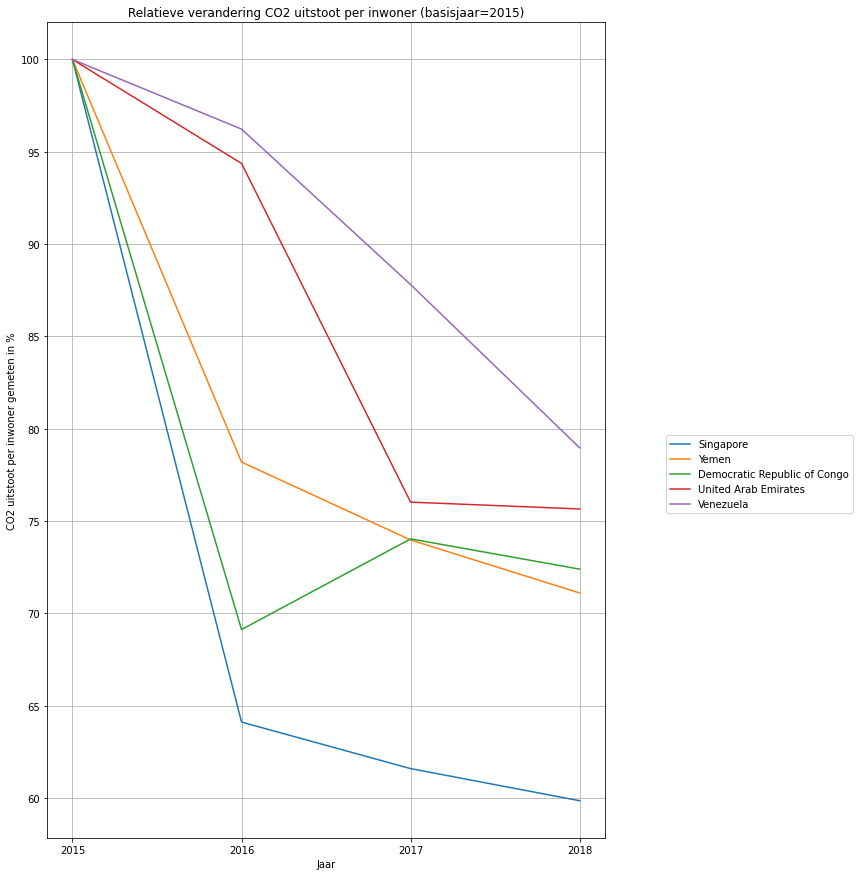

<Figure size 360x720 with 0 Axes>

In [44]:
#plotting a line diagram
#Base year is 2015
#showing top 5 countries that has the most CO2 reduction in 2018
top5_relative_change = relative_change.sort_values('relative change 2018 per capita in %').head(5)

#rename columns
top5_relative_change = top5_relative_change.rename(columns={'relative change 2015 per capita in %':'2015', 'relative change 2016 per capita in %':'2016', 'relative change 2017 per capita in %':'2017', 'relative change 2018 per capita in %': '2018'})
top5_relative_change

#re-ordering columns
top5_relative_change = top5_relative_change[['Entity', '2015','2016', '2017', '2018']]
top5_relative_change = top5_relative_change.set_index('Entity')

#variable for years
years = top5_relative_change.columns[0:5]
years

fig = plt.figure()
fig, ax = plt.subplots()

#for loop to plot dataset
for index, row in top5_relative_change.iterrows():
  plt.plot(years, row, label=index)

ax.set_xlabel("Jaar")
ax.set_ylabel("CO2 uitstoot per inwoner gemeten in %")
ax.set_title('Relatieve verandering CO2 uitstoot per inwoner (basisjaar=2015)')
plt.rcParams["figure.figsize"] = (5, 10) #Chart scaling
plt.legend(loc='best', bbox_to_anchor=(1.1, 0.5))
plt.grid(True)
plt.figure()

In [45]:
#Method 2:
#Calculate relative percentage change.
#Calculating cumulative percentage change.
#copy 'relative_change' dataset

percentage_change = relative_change.copy()

perc_change_2015 = round((percentage_change['relative change 2015 per capita in %'] - percentage_change['relative change 2015 per capita in %']) / percentage_change['relative change 2015 per capita in %'] *100, 2)
perc_change_2016 = round((percentage_change['relative change 2016 per capita in %'] - percentage_change['relative change 2015 per capita in %']) / percentage_change['relative change 2015 per capita in %'] *100, 2)
perc_change_2017 = round((percentage_change['relative change 2017 per capita in %'] - percentage_change['relative change 2016 per capita in %']) / percentage_change['relative change 2016 per capita in %'] *100, 2)
perc_change_2018 = round((percentage_change['relative change 2018 per capita in %'] - percentage_change['relative change 2017 per capita in %']) / percentage_change['relative change 2017 per capita in %'] *100, 2)

#relative percentage of each year are added up, calculate cumulative change per year
cumulative_percentage_change_total = perc_change_2016 + perc_change_2017 + perc_change_2018
cumulative_percentage_change_2016 = perc_change_2016
cumulative_percentage_change_2017 = perc_change_2017 + perc_change_2016

#adding new columns in dataset
percentage_change['relative change 2015 per capita in %'], percentage_change['relative change 2016 per capita in %'], percentage_change['relative change 2017 per capita in %'], percentage_change['relative change 2018 per capita in %'], percentage_change['cumulative change total in %'], percentage_change['cumulative change 2016'], percentage_change['cumulative change 2017'] = perc_change_2015, perc_change_2016, perc_change_2017, perc_change_2018, cumulative_percentage_change_total, cumulative_percentage_change_2016, cumulative_percentage_change_2017

#set index
percentage_change.set_index('Entity')
percentage_change.sort_values('cumulative change total in %').head(5)

,Entity,relative change 2015 per capita in %,relative change 2016 per capita in %,relative change 2017 per capita in %,relative change 2018 per capita in %,cumulative change total in %,cumulative change 2016,cumulative change 2017
133,Singapore,0.0,-35.88,-3.93,-2.82,-42.63,-35.88,-39.81
162,Yemen,0.0,-21.80,-5.40,-3.88,-31.08,-21.80,-27.20
39,Democratic Republic of Congo,0.0,-30.87,7.10,-2.22,-25.99,-30.87,-23.77
155,United Arab Emirates,0.0,-5.63,-19.43,-0.49,-25.55,-5.63,-25.06
160,Venezuela,0.0,-3.77,-8.75,-10.07,-22.59,-3.77,-12.52


<Figure size 720x1080 with 0 Axes>

<Figure size 360x720 with 0 Axes>

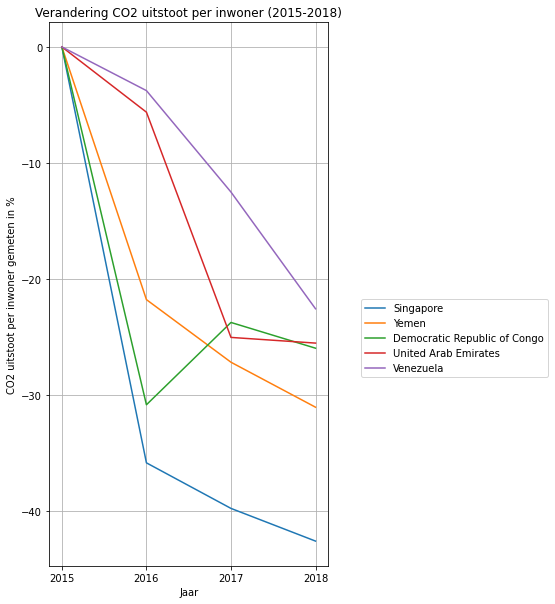

<Figure size 720x1080 with 0 Axes>

In [46]:
#plotting a line diagram
#apply cumulative CO2 % per year
#showing top 5 countries that has the most CO2 reduction
percentage_change_top5 = percentage_change.sort_values('cumulative change total in %').head(5)
#drop columns:
percentage_change_top5 = percentage_change_top5.drop(columns={'relative change 2016 per capita in %', 'relative change 2017 per capita in %', 'relative change 2018 per capita in %'})
#rename columns
percentage_change_top5 = percentage_change_top5.rename(columns={'relative change 2015 per capita in %':'2015', 'cumulative change 2016':'2016', 'cumulative change 2017':'2017', 'cumulative change total in %': '2018'})

#re-ordering columns
percentage_change_top5 = percentage_change_top5[['Entity', '2015','2016', '2017', '2018']]
percentage_change_top5 = percentage_change_top5.set_index('Entity')

#variable for years
years = percentage_change_top5.columns[0:5]
years

fig = plt.figure()
fig, ax = plt.subplots()

#for loop to plot dataset
for index, row in percentage_change_top5.iterrows():
  plt.plot(years, row, label=index)

ax.set_xlabel("Jaar")
ax.set_ylabel("CO2 uitstoot per inwoner gemeten in %")
ax.set_title('Verandering CO2 uitstoot per inwoner (2015-2018)')
plt.rcParams["figure.figsize"] = (10, 15) #Chart scaling
plt.legend(loc='best', bbox_to_anchor=(1.1, 0.5))
plt.grid(True)
plt.figure()

Conclusie: 


Relatieve verandering met basisjaar 2015
Als we kijken naar 2018 ten opzichte van 2015 dan doet Singapore het meest aan het reduceren van de CO2 uitstoot.
Ten opzichte van de CO2 uitstoot per inwoner van 2015 is het CO2 uitstoot per inwoner in 2018 met maar liefst 42,64% gedaald.  

Procentuele verandering t.o.v. voorgaande jaar
Omdat relatieve verandering niet veel inzichten geeft hoe de CO2 uitstoot per land ontwikkeld, gaan wij ook kijken naar de procentuele verandering per jaar. 

De top 3 landen hebben hun posities te danken aan het feit dat zij in 2016 flink hun CO2 uitstoot gereduceerd hebben ten opzichte van 2015, na het ondertekenen van het Klimaatakkoord. Singapore had in 2016 haar CO2 uitstoot met 35,88% gereduceerd ten opzichte van 2015, gevolgd door Democratische Republiek Congo (30,87%) en Yemen (21,8%). De jaren erna is er wel sprake van CO2 reductie, maar dan in mindere mate. In Singapore is de CO2 reductie van 2017 ten opzichte van 2016 slechts 3,93% en van 2018 op 2017 is het nog maar 2,83% procent reductie. Yemen deed het in 2017 (ten opzichte van 2016) iets beter dan Singapore met 5,39% en in 2018 een CO2 reductie van 3,88%. Congo deed het in 2017 slechter, met 7,1% meer uitstoot dan in 2016. In 2018 is er sprake van een CO2 reductie ten opzichte van 2017 met een percentage van 2,22%

Opvallend genoeg kent Venezuela een gelijkmatige procentuele daling.

Toekomst:
Berekenen wij de procentuele verandering per jaar en nemen wij het cumulatief dan zien wij dat Venezuele grote stappen maakt in het reduceren van CO2. 


####


#Which non-fossil fuel energy technology will have the best price in the future?
#https://ourworldindata.org/renewable-energy

## To be able to predict prices you'll probably need to use linear regression over the various non-fossil fuel options.


Achtergrondinformatie:

https://www.irena.org/publications/2021/Jun/Renewable-Power-Costs-in-2020

Between 2000 and 2020, renewable power generation capacity worldwide increased 3.7‑fold, from 754 gigawatts (GW) to 2 799 GW, as their costs have fallen sharply, driven by steadily improving technologies, economies of scale, competitive supply chains and improving developer experience. Costs for electricity from utility-scale solar photovoltaics (PV) fell 85% between 2010 and 2020.

The cost of electricity from solar and wind power has fallen, to very low levels. Since 2010, globally, a cumulative total of 644 GW of renewable power generation capacity has been added with estimated costs that have been lower than the cheapest fossil fuel-fired option in each respective year. In emerging economies, the 534 GW added at costs lower than fossil fuels, will reduce electricity generation costs by up to USD 32 billion this year.


Using installed capacity to calculate the cost:

https://exploringgreentechnology.com/glossary/installed-capacity-definition/

https://exploringgreentechnology.com/solar-energy/cost-of-solar-panels/
Solar costs per kWh hour are calculated by dividing the total expected cost of a system (modules, inverters, installation etc) by the expected total energy output. Obviously there isn't an ongoing per kWh cost as the electricity trickles in.

"""

non-fossil energy:
hydro
solar
wind
nuclear
gas

"""

Methodiek om prijs te berekenen:

1) Using LCOE of various renewable energy sources to calculate the price per KWH


In [47]:
#using LCOE method: Levelized Cost of Energy
#This system allows us to compare the costs of financing, building, running, and maintaining a power plant. The values of each energy source will be expressed in US dollars per megawatt-hour.
#The LCOE "represents the average revenue per unit of electricity generated that would be required to recover the costs of building and operating a generating plant during an assumed financial life and duty cycle

#import data
df_lcoe = pd.read_csv('https://raw.githubusercontent.com/88kHw88/Winc.Final_Assignment.CO2/main/data_question_3/levelized-cost-of-energy.csv')
df_lcoe


,Entity,Code,Year,CSP LCOE (2019 USD/kWh),Hydro LCOE (2019 USD/kWh),Solar LCOE (2019 USD/kWh),Onshore wind LCOE (2019 USD/kWh),Bioenergy LCOE (2019 USD/kWh),Geothermal LCOE (2019 USD/kWh),Offshore wind LCOE (2019 USD/kWh)
0,Brazil,BRA,1998,NaN,NaN,NaN,0.069,NaN,NaN,NaN
1,Brazil,BRA,2001,NaN,NaN,NaN,0.149,NaN,NaN,NaN
2,Brazil,BRA,2002,NaN,NaN,NaN,0.129,NaN,NaN,NaN
3,Brazil,BRA,2003,NaN,NaN,NaN,0.145,NaN,NaN,NaN
4,Brazil,BRA,2005,NaN,NaN,NaN,0.137,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
408,World,OWID_WRL,2005,NaN,NaN,NaN,0.104,NaN,NaN,0.105
409,World,OWID_WRL,2006,NaN,NaN,NaN,0.105,NaN,NaN,0.108
410,World,OWID_WRL,2007,NaN,NaN,NaN,0.098,NaN,0.048498,0.178
411,World,OWID_WRL,2008,NaN,NaN,NaN,0.088,NaN,0.042653,0.178


In [48]:
#analyzing data
df_lcoe.describe()

#renaming dataset:
df_lcoe = df_lcoe.rename(columns={'CSP LCOE (2019 USD/kWh)':'CSP (USD/kWh)', 'Hydro LCOE (2019 USD/kWh)': 'Hydro power (USD/kWh)', 'Onshore wind LCOE (2019 USD/kWh)': 'Onshore wind power (USD/kWh)', 'Solar LCOE (2019 USD/kWh)':'Solar power (USD/kWh)','Bioenergy LCOE (2019 USD/kWh)': 'Bio-energy (USD/kWh)','Geothermal LCOE (2019 USD/kWh)':'Geothermal power (USD/kWh)', 'Offshore wind LCOE (2019 USD/kWh)':'Offshore wind power (USD/kWh)'})
df_lcoe

#dropping columns because of low amount of data point
#df_lcoe.drop(columns=['CSP LCOE (2019 USD/kWh)', ('Hydro LCOE (2019 USD/kWh)', 'Bioenergy LCOE')])

#dataset for onshore wind energy dropping missing values:
df_lcoe_onshore = df_lcoe.dropna(subset=['Year', 'Onshore wind power (USD/kWh)'])
df_lcoe_onshore.head(5)

#dataset for solar energy dropping missing values:
df_lcoe_solar = df_lcoe.dropna(subset=['Year', 'Solar power (USD/kWh)'])
df_lcoe_solar.head(5)

#dataset for hydro energy dropping missing values:
df_lcoe_hydro = df_lcoe.dropna(subset=['Year', 'Hydro power (USD/kWh)'])
df_lcoe_hydro.head(5)

#dataset for concentrated solar power (CSP) dropping missing values:
df_lcoe_csp = df_lcoe.dropna(subset=['Year', 'CSP (USD/kWh)'])
df_lcoe_csp.head(5)

#dataset for bio-energy power dropping missing values:
df_lcoe_bio = df_lcoe.dropna(subset=['Year', 'Bio-energy (USD/kWh)'])
df_lcoe_bio.head(5)

#dataset for geothermal power dropping missing values:
df_lcoe_geo = df_lcoe.dropna(subset=['Year', 'Geothermal power (USD/kWh)'])
df_lcoe_geo.head(5)

#dataset for geothermal power dropping missing values:
df_lcoe_offshore = df_lcoe.dropna(subset=['Year', 'Offshore wind power (USD/kWh)'])
df_lcoe_offshore.head(5)



,Entity,Code,Year,CSP (USD/kWh),Hydro power (USD/kWh),Solar power (USD/kWh),Onshore wind power (USD/kWh),Bio-energy (USD/kWh),Geothermal power (USD/kWh),Offshore wind power (USD/kWh)
376,World,OWID_WRL,2010,0.3462,0.037103,0.3783,0.086,0.075597,0.048786,0.161
377,World,OWID_WRL,2011,0.3484,0.035594,0.2863,0.083,0.055425,NaN,0.175
378,World,OWID_WRL,2012,0.3525,0.037753,0.2225,0.083,0.060869,0.084536,0.154
379,World,OWID_WRL,2013,0.2681,0.042926,0.1751,0.082,0.081262,0.061515,0.177
380,World,OWID_WRL,2014,0.2432,0.043932,0.1636,0.076,0.082069,0.063591,0.183


In [49]:
#Because data from some energy sources have been collected longer than other energy sources:
#we exclude data where year < 2010
#data from 2010 and onward

#data onshore wind power from 2010
df_lcoe_onshore_2010 = df_lcoe_onshore.loc[df_lcoe_onshore['Year'] >= 2010]
df_lcoe_onshore_2010

#data geothermalpower from 2010
df_lcoe_geo_2010 = df_lcoe_geo.loc[df_lcoe_geo['Year'] >= 2010]
df_lcoe_geo_2010

#data offshore wind power from 2010
df_lcoe_offshore_2010 = df_lcoe_offshore.loc[df_lcoe_offshore['Year'] >= 2010]
df_lcoe_offshore_2010



,Entity,Code,Year,CSP (USD/kWh),Hydro power (USD/kWh),Solar power (USD/kWh),Onshore wind power (USD/kWh),Bio-energy (USD/kWh),Geothermal power (USD/kWh),Offshore wind power (USD/kWh)
376,World,OWID_WRL,2010,0.3462,0.037103,0.3783,0.086,0.075597,0.048786,0.161
377,World,OWID_WRL,2011,0.3484,0.035594,0.2863,0.083,0.055425,NaN,0.175
378,World,OWID_WRL,2012,0.3525,0.037753,0.2225,0.083,0.060869,0.084536,0.154
379,World,OWID_WRL,2013,0.2681,0.042926,0.1751,0.082,0.081262,0.061515,0.177
380,World,OWID_WRL,2014,0.2432,0.043932,0.1636,0.076,0.082069,0.063591,0.183
381,World,OWID_WRL,2015,0.2508,0.039014,0.1264,0.069,0.073028,0.060107,0.169
382,World,OWID_WRL,2016,0.2903,0.052220,0.1139,0.066,0.071932,0.069951,0.146
383,World,OWID_WRL,2017,0.2533,0.055025,0.0924,0.064,0.072432,0.074109,0.131
384,World,OWID_WRL,2018,0.1844,0.044514,0.0787,0.058,0.056632,0.070282,0.127
385,World,OWID_WRL,2019,0.1823,0.047287,0.0684,0.053,0.065647,0.071860,0.115


In [50]:
#Several sources to calculate the slope and other statistics from linear regression

#https://stackoverflow.com/questions/38385162/calculating-slope-for-a-series-trendline-in-pandas
#https://www.stat.auckland.ac.nz/~wild/d2i/articles/4.4%20Interpreting%20the%20Slope%20of%20a%20Trend%20Line_ARTICLE.pdf
#https://www.w3schools.com/datascience/ds_linear_slope.asp


#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
#https://stackoverflow.com/questions/9538525/calculating-slopes-in-numpy-or-scipy <<------

In [51]:
#Method 1 to determine the slope and intercept of the regression line:
#using np.polyfit to calculate the slope and intercept of the regressions fit line
#https://www.w3schools.com/datascience/ds_linear_slope.asp 
df_lcoe_csp
x = df_lcoe_csp["Year"]
y = df_lcoe_csp["CSP (USD/kWh)"]
slope_intercept = np.polyfit(x,y,1)

slope_intercept
#regression line formula:
# y = -0.001845x + 37.4474
#Each increase in value X means a -0.001845 USD/kWh in costs. When x = 0, starting value is 37.4474

array([-1.84539394e-02,  3.74474109e+01])

In [52]:
#Method 2:
#using scipy to determine slope, intercept and other statistical values:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html 
#from scipy import stats

x = df_lcoe_csp["Year"]
y = df_lcoe_csp["CSP (USD/kWh)"]
res = stats.linregress(x, y)
res

LinregressResult(slope=-0.018453939393939394, intercept=37.447410909090905, rvalue=-0.8893472435729111, pvalue=0.0005727453714460964, stderr=0.0033543605653792146)

In [53]:
#define function to plot a scatterplot with a regression fit line
#calculate slope of the regression line to determine future price
#calculate other statistical values from the regression model
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html  
def plot_scatterplot_fitted(df, column1, column2):
  fig = plt.figure()
  fig, ax = plt.subplots()

  x = df[column1]
  y = df[column2]
  res = stats.linregress(x, y)
  try:
    plt.plot(x, y, 'o', label='original data')
    plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
  except ValueError as error:
    print(f"Could not plot linear regression line because:{error}")
  
  plt.title(f'Toekomstige kostenindicatie van {column2}')
  plt.xlabel(column1)
  plt.ylabel(column2)  
  ax.scatter(x, y)
  plt.grid(axis='both')
  plt.xticks(np.arange(min(x), max(x)+1, 1.0))
  plt.legend()
  plt.show()

  helling = round(res.slope,4)
  intercept = round(res.intercept,4)

  print(f'De helling van de regressielijn is: {helling}')
  print(f'Het startgetal van de regressielijn is: {intercept}')
  print(f'De formule van de lineaire regressie lijn: y = {helling}x + {intercept}')
  #Coefficient of determination (R-squared):
  print(f"r2-waarde: {res.rvalue**2:.6f}")
  print(f'n = {len(df)}')

def result_lingress(df, column1, column2):
  x = df[column1]
  y = df[column2]
  #Gives the result of the slope, intercept, correlation (rvalue) and other statistical values:
  #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html 
  res = stats.linregress(x, y)
  print(res)


def statistical_scatterplot(df, column1, column2):
  plot_scatterplot_fitted(df, column1, column2)
  correlation(df, column1, column2)
  result_lingress(df, column1, column2)

<Figure size 720x1080 with 0 Axes>

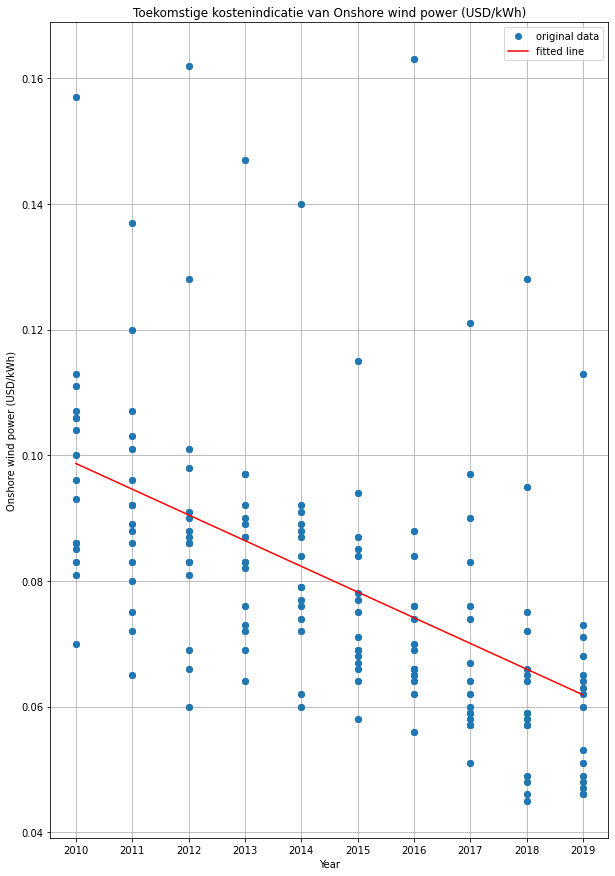

De helling van de regressielijn is: -0.0041
Het startgetal van de regressielijn is: 8.3255
De formule van de lineaire regressie lijn: y = -0.0041x + 8.3255
r2-waarde: 0.275844
n = 159
De correlatiecoëfficiënt tussen 'Year' en 'Onshore wind power (USD/kWh)' is: -0.5252
LinregressResult(slope=-0.0040929231795653834, intercept=8.325464477697293, rvalue=-0.5252084038147552, pvalue=1.182757982701608e-12, stderr=0.000529258945371633)


In [54]:
#plot scatterplot onshore wind power from 2010 and onward
statistical_scatterplot(df_lcoe_onshore_2010, 'Year', 'Onshore wind power (USD/kWh)')

<Figure size 720x1080 with 0 Axes>

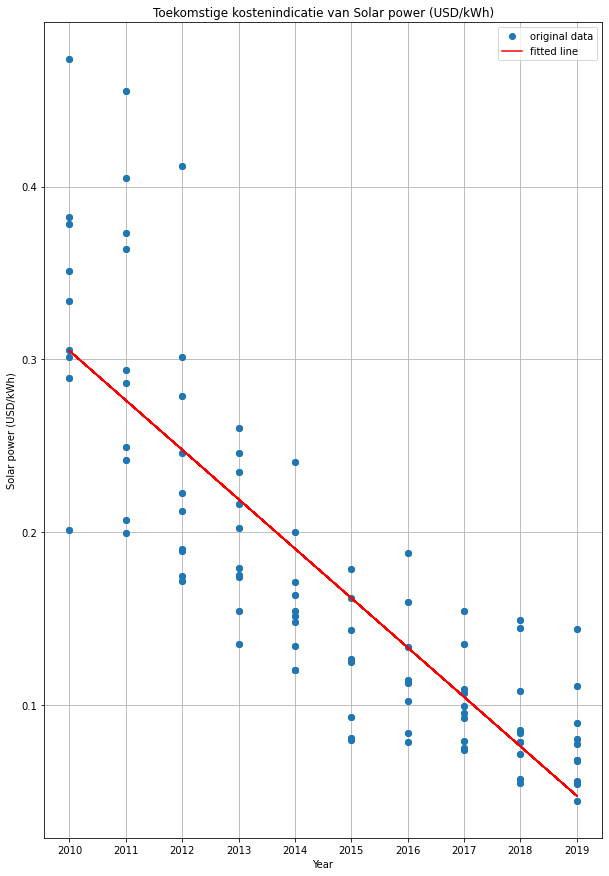

De helling van de regressielijn is: -0.0286
Het startgetal van de regressielijn is: 57.7853
De formule van de lineaire regressie lijn: y = -0.0286x + 57.7853
r2-waarde: 0.695417
n = 98
De correlatiecoëfficiënt tussen 'Year' en 'Solar power (USD/kWh)' is: -0.8339
LinregressResult(slope=-0.02859720194647196, intercept=57.78534169273537, rvalue=-0.8339167156159398, pvalue=1.6013866017168078e-26, stderr=0.0019316036320367663)


In [55]:
#plot scatterplot of solar power LCOE (USD/kWh):
statistical_scatterplot(df_lcoe_solar, 'Year', 'Solar power (USD/kWh)')

<Figure size 720x1080 with 0 Axes>

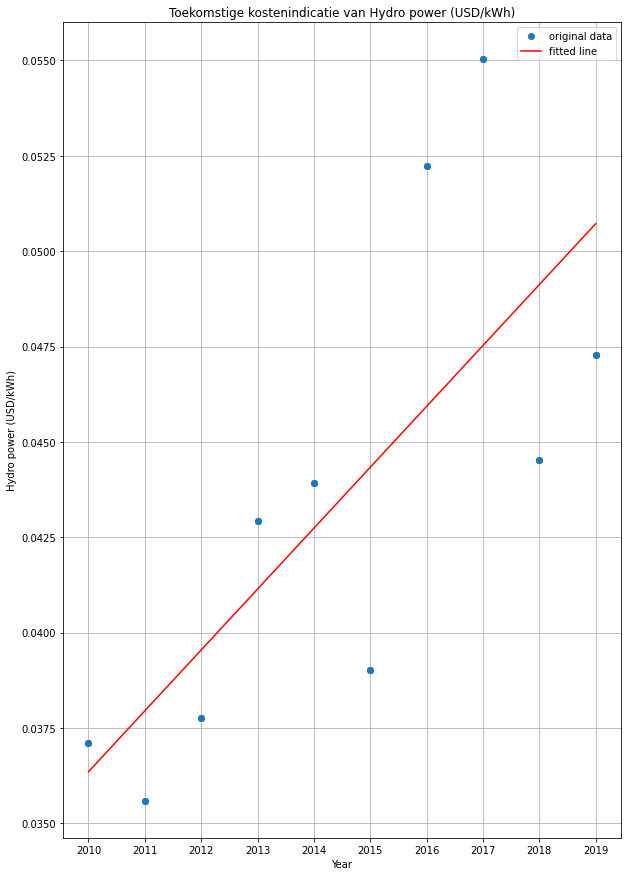

De helling van de regressielijn is: 0.0016
Het startgetal van de regressielijn is: -3.1727
De formule van de lineaire regressie lijn: y = 0.0016x + -3.1727
r2-waarde: 0.551472
n = 10
De correlatiecoëfficiënt tussen 'Year' en 'Hydro power (USD/kWh)' is: 0.7426
LinregressResult(slope=0.0015965310401595376, intercept=-3.1726750850302654, rvalue=0.7426114542026225, pvalue=0.013883448872166523, stderr=0.0005090560693428794)


In [56]:
#plot scatterplot of hydro power LCOE (USD/kWh):
statistical_scatterplot(df_lcoe_hydro, 'Year', 'Hydro power (USD/kWh)')

<Figure size 720x1080 with 0 Axes>

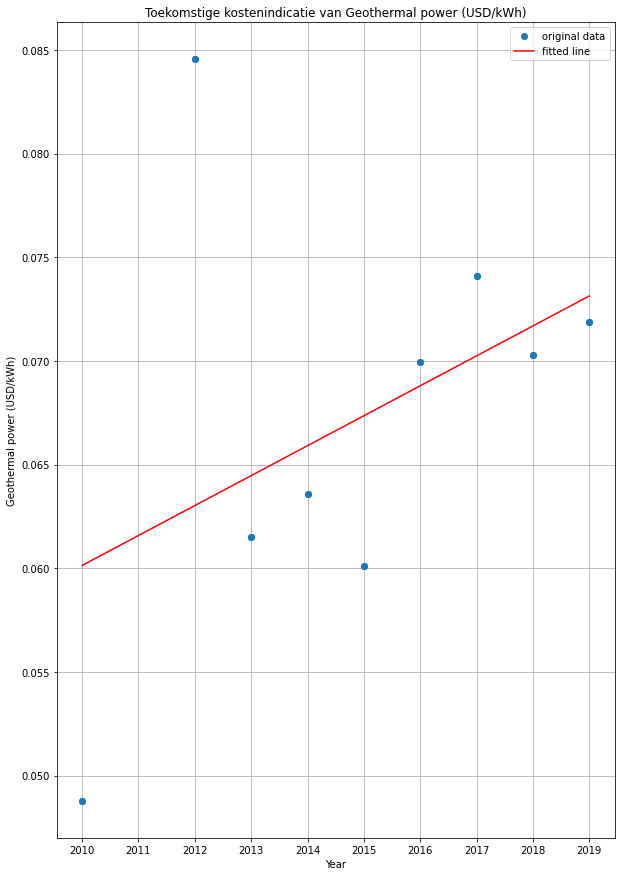

De helling van de regressielijn is: 0.0014
Het startgetal van de regressielijn is: -2.8428
De formule van de lineaire regressie lijn: y = 0.0014x + -2.8428
r2-waarde: 0.174851
n = 9
De correlatiecoëfficiënt tussen 'Year' en 'Geothermal power (USD/kWh)' is: 0.4182
LinregressResult(slope=0.0014442365258579167, intercept=-2.842783085917957, rvalue=0.41815240427642236, pvalue=0.2627105386861625, stderr=0.0011858254887358098)


In [57]:
#plot scatterplot geothermal power from 2010 and onward
statistical_scatterplot(df_lcoe_geo_2010, 'Year', 'Geothermal power (USD/kWh)')

<Figure size 720x1080 with 0 Axes>

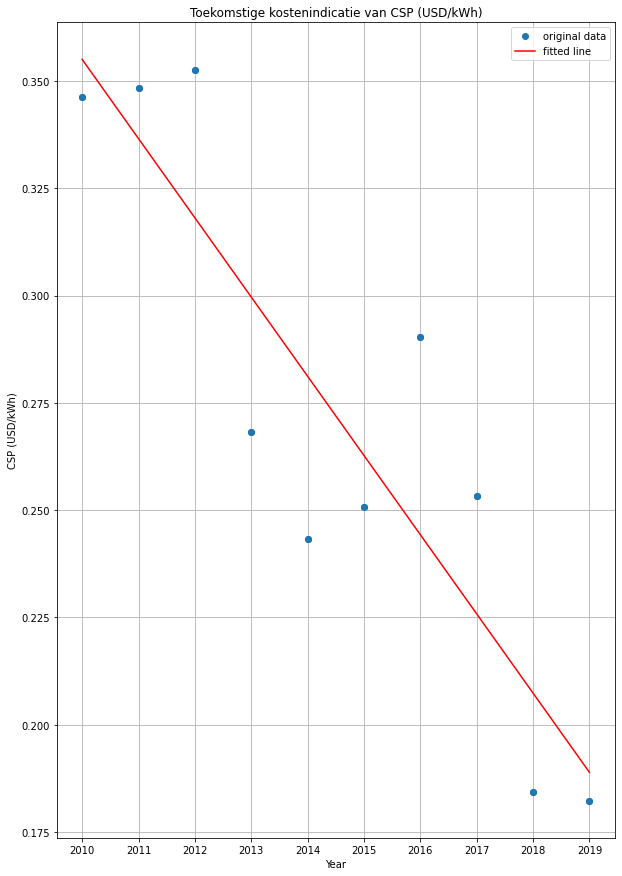

De helling van de regressielijn is: -0.0185
Het startgetal van de regressielijn is: 37.4474
De formule van de lineaire regressie lijn: y = -0.0185x + 37.4474
r2-waarde: 0.790939
n = 10
De correlatiecoëfficiënt tussen 'Year' en 'CSP (USD/kWh)' is: -0.8893
LinregressResult(slope=-0.018453939393939394, intercept=37.447410909090905, rvalue=-0.8893472435729111, pvalue=0.0005727453714460964, stderr=0.0033543605653792146)


In [58]:
#plot scatterplot of Concentrated solar power LCOE (USD/kWh):
statistical_scatterplot(df_lcoe_csp, 'Year', 'CSP (USD/kWh)')

<Figure size 720x1080 with 0 Axes>

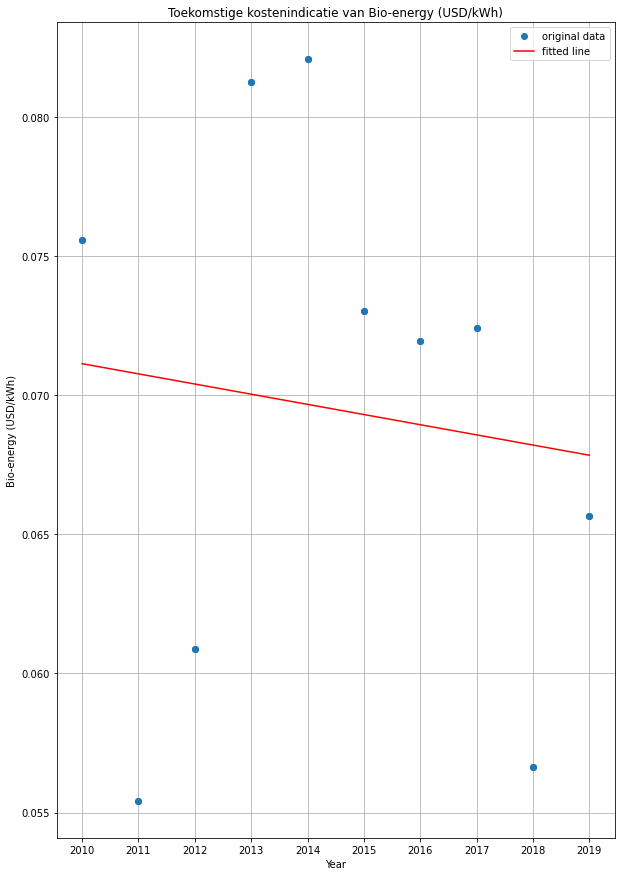

De helling van de regressielijn is: -0.0004
Het startgetal van de regressielijn is: 0.806
De formule van de lineaire regressie lijn: y = -0.0004x + 0.806
r2-waarde: 0.013555
n = 10
De correlatiecoëfficiënt tussen 'Year' en 'Bio-energy (USD/kWh)' is: -0.1164
LinregressResult(slope=-0.00036558708368972524, intercept=0.8059646995760246, rvalue=-0.11642395138595645, pvalue=0.7487466565313735, stderr=0.001102656025527194)


In [59]:
#plot scatterplot of bio-energy power LCOE (USD/kWh):
statistical_scatterplot(df_lcoe_bio, 'Year', 'Bio-energy (USD/kWh)')

<Figure size 720x1080 with 0 Axes>

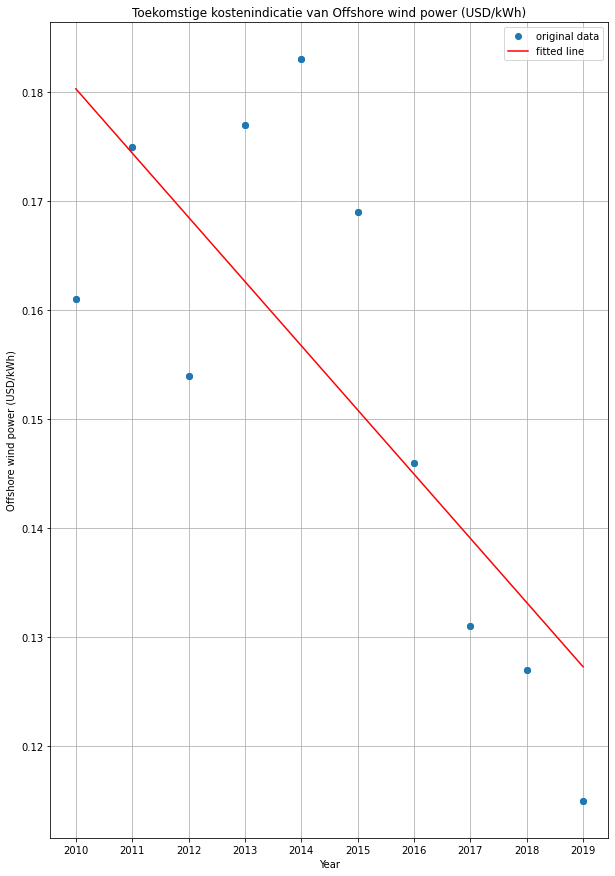

De helling van de regressielijn is: -0.0059
Het startgetal van de regressielijn is: 12.021
De formule van de lineaire regressie lijn: y = -0.0059x + 12.021
r2-waarde: 0.581009
n = 10
De correlatiecoëfficiënt tussen 'Year' en 'Offshore wind power (USD/kWh)' is: -0.7622
LinregressResult(slope=-0.005890909090909091, intercept=12.021036363636364, rvalue=-0.7622397125910009, pvalue=0.010373728902025961, stderr=0.0017686744659182426)


In [60]:
#plot scatterplot offshore wind power from 2010 and onwards
statistical_scatterplot(df_lcoe_offshore_2010, 'Year', 'Offshore wind power (USD/kWh)')

Based on the linear regression the solar power is the best future energy generator in regards of price/kWh. However the concentrated solar power is deemed to be a great alternative, but we lack data. 